In [2]:
import os
import glob
import numpy as np
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

from cycler import cycler

from scipy.signal import savgol_filter

import scipy.integrate as integrate
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.optimize import least_squares
from scipy.signal import savgol_filter

import pandas as pd

In [6]:
def gen_wvfm(Vprogram, Verase, Tdelay_start, Tdelay_end, num_step, Tread, Twait, Trf, Tpw, Vread, Vdrain, points, ch1_range, ch2_range):
    Tdelay = np.logspace(np.log10(Tdelay_start), np.log10(Tdelay_end), num=num_step)
    
    T = [0, Twait, Trf, Tpw, Trf, Twait]
    V = [0, 0, Verase, Verase, 0, 0]
    Vd = [0, 0, 0, 0, 0, 0]
    
    tm = []
    m2 = []
    m3 = []
    m4 = []
    m5 = []
    m6 = []
    
    for i in range(len(Tdelay)): 
        T.append(Trf)
        V.append(Vprogram)
        Vd.append(0)
        
        T.append(Tpw)
        V.append(Vprogram)
        Vd.append(0)
        
        T.append(Trf)
        V.append(0)
        Vd.append(0)
     
        T.append(Tdelay[i])
        V.append(0)
        Vd.append(0)
        
        T.append(Trf)
        V.append(0)
        Vd.append(Vdrain)
        
        T.append(Tread)
        V.append(Vread)
        Vd.append(Vdrain)
        
        T.append(Trf)
        V.append(0)
        Vd.append(0)
        
        T.append(Twait)
        V.append(0)
        Vd.append(0)
        
        T.append(Trf)
        V.append(Verase)
        Vd.append(0)
        
        T.append(Tpw)
        V.append(Verase)
        Vd.append(0)
        
        T.append(Trf)
        V.append(0)
        Vd.append(0)
        
        T.append(Tdelay[i])
        V.append(0)
        Vd.append(0)
        
        T.append(Trf)
        V.append(0)
        Vd.append(Vdrain)
        
        T.append(Tread)
        V.append(Vread)
        Vd.append(Vdrain)
        
        
        T.append(Trf)
        V.append(0)
        Vd.append(0)
        
        T.append(Twait)
        V.append(0)
        Vd.append(0)
        
    
    T_cum = np.cumsum(T, axis=0)
    tm = T_cum[10::8]
    m2 = np.repeat(points,2*len(Tdelay))
    m3 = np.repeat(Tread/points,2*len(Tdelay))
    m4 = np.repeat(Tread/points,2*len(Tdelay))
    m5 = np.repeat(ch1_range,2*len(Tdelay))
    m6 = np.repeat(ch2_range,2*len(Tdelay))
        
    waveform_file = np.column_stack([T_cum,V,Vd])
    meas_event = np.column_stack([tm,m2,m3,m4,m5,m6])
    filename = "ReadAfterWrite_Vwrite({Vprogram}V_{Verase}V_{Tpw}s)_Vread({Vread}V_{Tread:.1e}s_{points}pts)_Tdelay({Tdelay_start}s_{Tdelay_end}s_{num_step}steps)".format(
                Vprogram = Vprogram, Verase = Verase, Tpw = Tpw, Vread = Vread, Tread = Tread, 
                points = points, Tdelay_start = Tdelay_start, Tdelay_end = Tdelay_end, num_step = num_step)
    np.savetxt(filename+"_Vgd-t.csv", waveform_file,fmt='%.12f',delimiter=',')
    np.savetxt(filename+"_meas_event.csv",meas_event,fmt='%.5f',delimiter=',')
    return T_cum, V, Vd

In [147]:
delay_end=10, num_step=10,
         Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-5, Vread=2, Vdrain=0.05, points=200, ch1_range=0, ch2_range=2)

(20, 6)


(-4.0, 4.0)

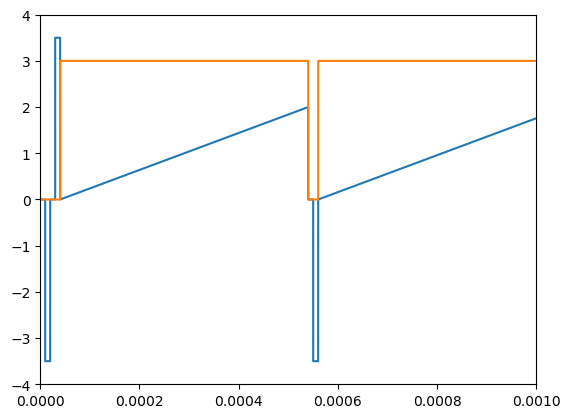

In [118]:
'test({pulsewidth}-ns)'.format(pulsewidth=10)


'test(10-ns)'

In [154]:
os.chdir('/Users/yejinhong/FeFET waveform/Waveforms_Vread_2')

In [4]:
## nFET 10 us symmetric program-erase
Vg = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
for Vg in Vg: 
    gen_wvfm(Vprogram=Vg, Verase=-Vg, Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
         Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-5, Vread=2, Vdrain=0.05, points=200, ch1_range=0, ch2_range=2)

## nFET 1 us symmetric program-erase
Vg = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
for Vg in Vg: 
    gen_wvfm(Vprogram=Vg, Verase=-Vg, Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
         Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-6, Vread=2, Vdrain=0.05, points=200, ch1_range=0, ch2_range=2)

## nFET 100 ns symmetric program-erase
Vg = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
for Vg in Vg: 
    gen_wvfm(Vprogram=Vg, Verase=-Vg, Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
         Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-7, Vread=2, Vdrain=0.05, points=200, ch1_range=0, ch2_range=2)

NameError: name 'np' is not defined

In [4]:
location = "/Users/yejinhong/FeFET waveform"
dir = "pFET symmetric waveforms Vread 1.5"
path = os.path.join(location,dir)

# Trying to create a location+dir directory.
try: 
    os.mkdir(path) 
except OSError as error: 
    print(error) 
    
os.chdir(path)


## pFET 10 us symmetric program-erase
Vg = np.array([1.5, 2.0, 2.5, 3.0, 3.5])
for Vg in Vg: 
    gen_wvfm(Vprogram=-Vg, Verase=Vg, Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
         Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-5, Vread=-1.5, Vdrain=-0.05, points=200, ch1_range=0, ch2_range=2)

## pFET 1 us symmetric program-erase
Vg = np.array([1.5, 2.0, 2.5, 3.0, 3.5])
for Vg in Vg: 
    gen_wvfm(Vprogram=-Vg, Verase=Vg, Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
         Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-6, Vread=-1.5, Vdrain=-0.05, points=200, ch1_range=0, ch2_range=2)

## pFET 100 ns symmetric program-erase
Vg = np.array([1.5, 2.0, 2.5, 3.0, 3.5])
for Vg in Vg: 
    gen_wvfm(Vprogram=-Vg, Verase=Vg, Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
         Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-7, Vread=-1.5, Vdrain=-0.05, points=200, ch1_range=0, ch2_range=2)

In [164]:
location = "/Users/yejinhong/FeFET waveform"
dir = "nFET asymmetric waveforms"
path = os.path.join(location,dir)

# Trying to create a location+dir directory.
try: 
    os.mkdir(path) 
except OSError as error: 
    print(error) 
    
os.chdir(path)

V_e = [-3.0, -3.5, -4.0]
V_p = [3.0, 3.5, 4.0, 4.5, 5.0]

## nFET 10 us asymmetric program-erase
for i in range(len(V_e)): 
    for j in range(len(V_p)):
        gen_wvfm(Vprogram=V_p[j], Verase=V_e[i], Tdelay_start=10e-9, Tdelay_end=10, num_step=10, 
                 Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-5, Vread=2, Vdrain=0.05, points=200, ch1_range=0, ch2_range=2)

## nFET 1 us asymmetric program-erase
for i in range(len(V_e)): 
    for j in range(len(V_p)):
        gen_wvfm(Vprogram=V_p[j], Verase=V_e[i], Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
                 Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-6, Vread=2, Vdrain=0.05, points=200, ch1_range=0, ch2_range=2)

## nFET 100 ns asymmetric program-erase
for i in range(len(V_e)): 
    for j in range(len(V_p)):
        gen_wvfm(Vprogram=V_p[j], Verase=V_e[i], Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
                 Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-7, Vread=2, Vdrain=0.05, points=200, ch1_range=0, ch2_range=2)

In [167]:
location = "/Users/yejinhong/FeFET waveform"
dir = "pFET asymmetric waveforms"
path = os.path.join(location,dir)

# Trying to create a location+dir directory.
try: 
    os.mkdir(path) 
except OSError as error: 
    print(error) 
    
os.chdir(path)

V_e = [3.0, 3.5, 4.0]
V_p = [-3.0, -3.5, -4.0, -4.5, -5.0]

## pFET 10 us asymmetric program-erase
for i in range(len(V_e)): 
    for j in range(len(V_p)):
        gen_wvfm(Vprogram=V_p[j], Verase=V_e[i], Tdelay_start=10e-9, Tdelay_end=10, num_step=10, 
                 Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-5, Vread=-2, Vdrain=-0.05, points=200, ch1_range=0, ch2_range=2)

## pFET 1 us asymmetric program-erase
for i in range(len(V_e)): 
    for j in range(len(V_p)):
        gen_wvfm(Vprogram=V_p[j], Verase=V_e[i], Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
                 Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-6, Vread=-2, Vdrain=-0.05, points=200, ch1_range=0, ch2_range=2)

## pFET 100 ns asymmetric program-erase
for i in range(len(V_e)): 
    for j in range(len(V_p)):
        gen_wvfm(Vprogram=V_p[j], Verase=V_e[i], Tdelay_start=10e-9, Tdelay_end=10, num_step=10,
                 Tread=5e-4, Twait=1e-5, Trf=5e-8, Tpw=1e-7, Vread=-2, Vdrain=-0.05, points=200, ch1_range=0, ch2_range=2)

[Errno 17] File exists: '/Users/yejinhong/FeFET waveform/pFET asymmetric waveforms'
